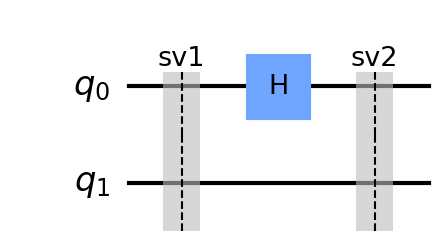

<IPython.core.display.Math object>

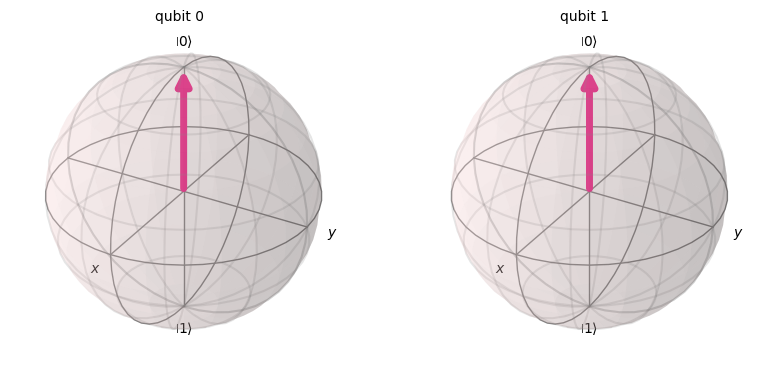

<IPython.core.display.Math object>

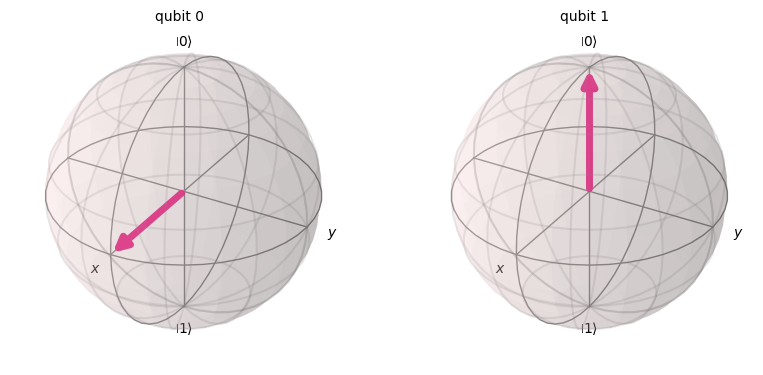

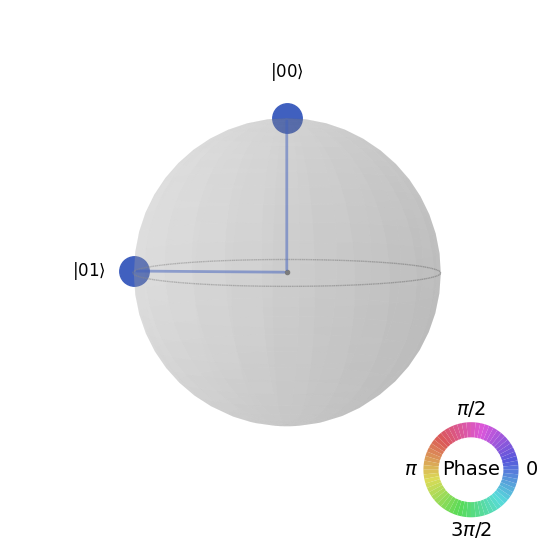

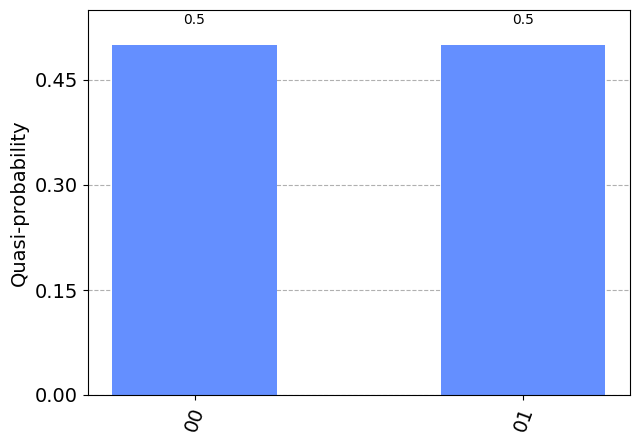

In [12]:
"""entanglement.ipynb"""
# Cell 1 - Two qubits NOT entangled (no measurement)

from __future__ import annotations

import typing

import numpy as np
from IPython.core.display import Math
from qis101_utils import as_latex
from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_bloch_multivector  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore
from qiskit.visualization import plot_state_qsphere  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any


backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(2)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))  # type: ignore

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))  # type: ignore

display(plot_state_qsphere(sv2))  # type: ignore

plot_distribution(counts)


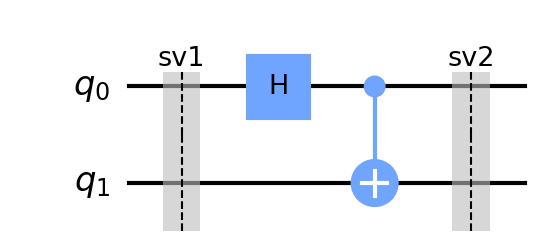

<IPython.core.display.Math object>

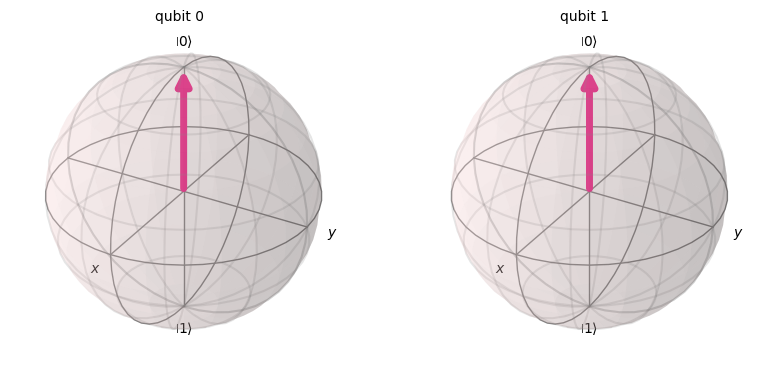

<IPython.core.display.Math object>

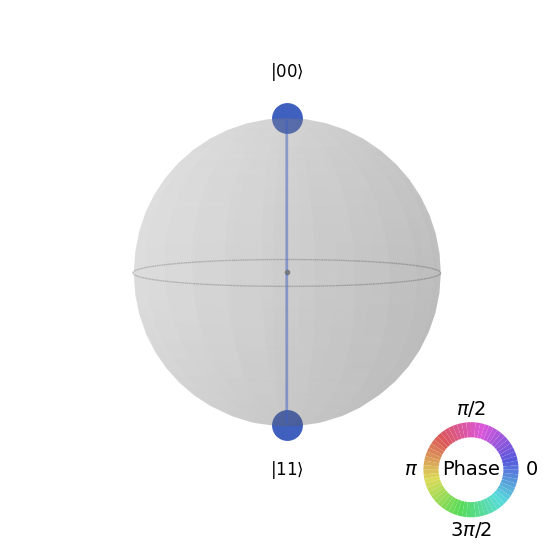

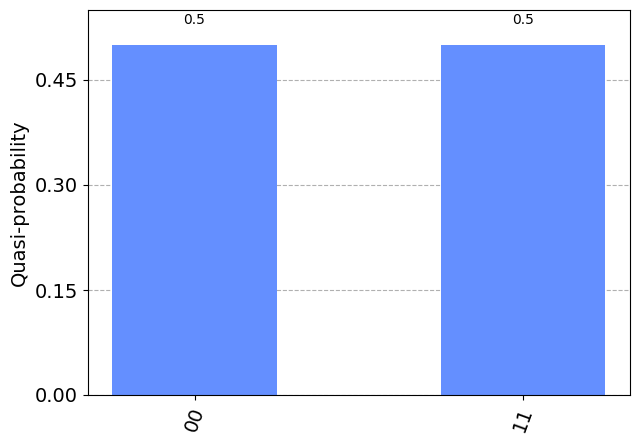

In [13]:
# Cell 2 - Two qubits ENTANGLED (no measurement)

backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(2)
qc.save_statevector("sv1")
qc.h(0)
qc.cx(0, 1)
qc.save_statevector("sv2")

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))  # type: ignore

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_state_qsphere(sv2))  # type: ignore

display(plot_distribution(counts))  # type: ignore


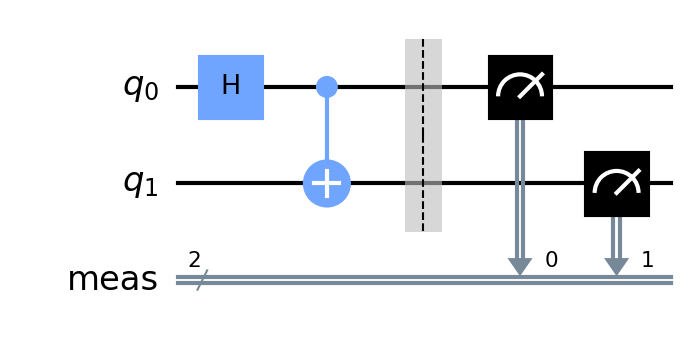

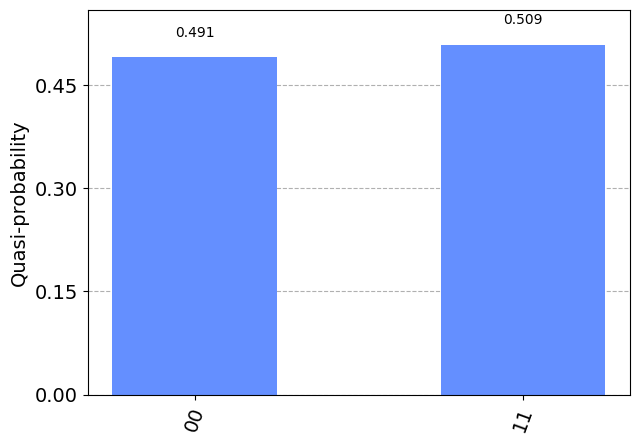

In [4]:
# Cell 3 - Two qubits ENTANGLED (use default 1024 shots)

backend: Any = Aer.get_backend("aer_simulator")

qc: Any = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
display(plot_distribution(counts))  # type: ignore


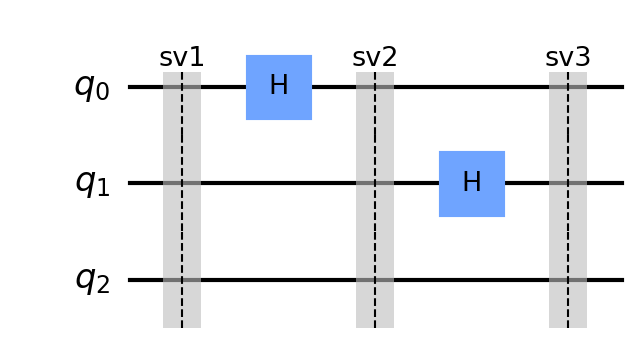

<IPython.core.display.Math object>

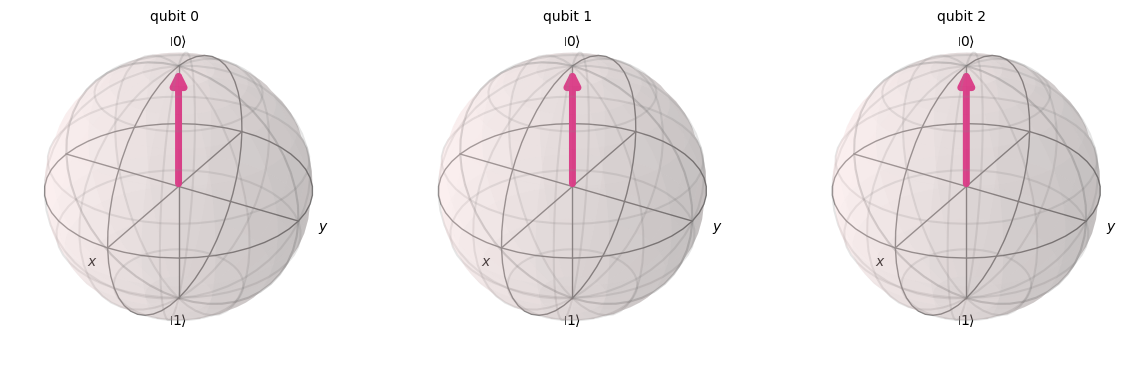

<IPython.core.display.Math object>

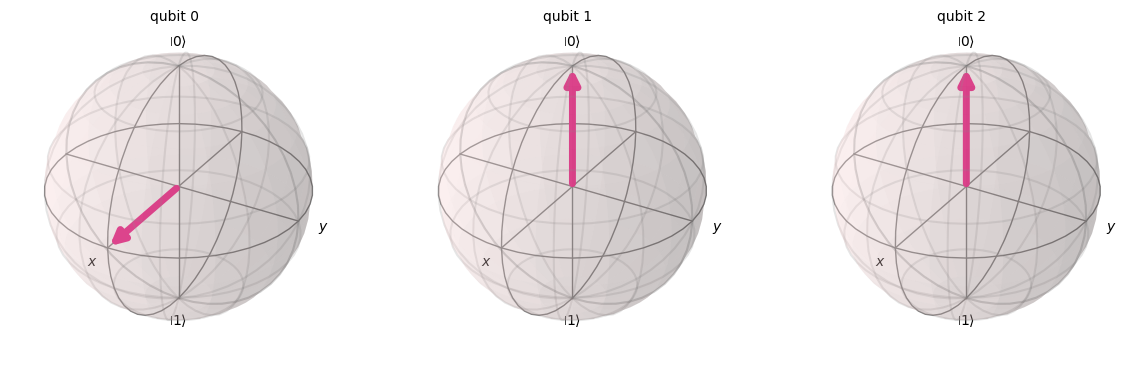

<IPython.core.display.Math object>

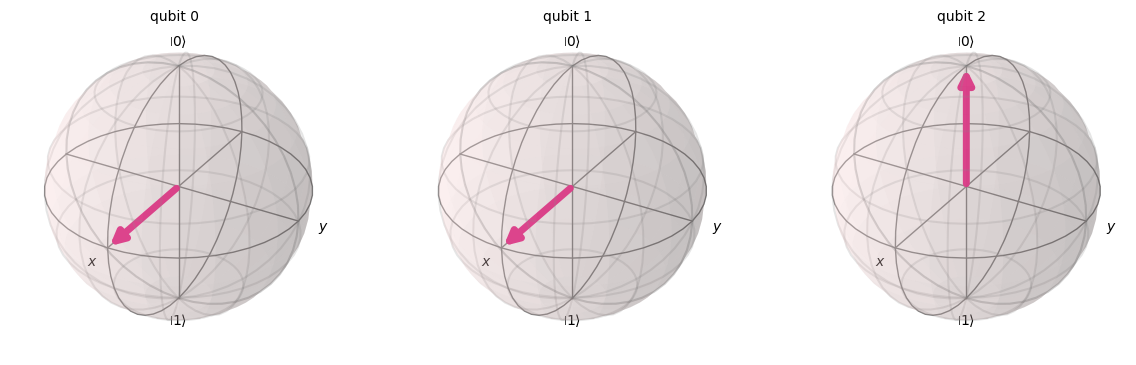

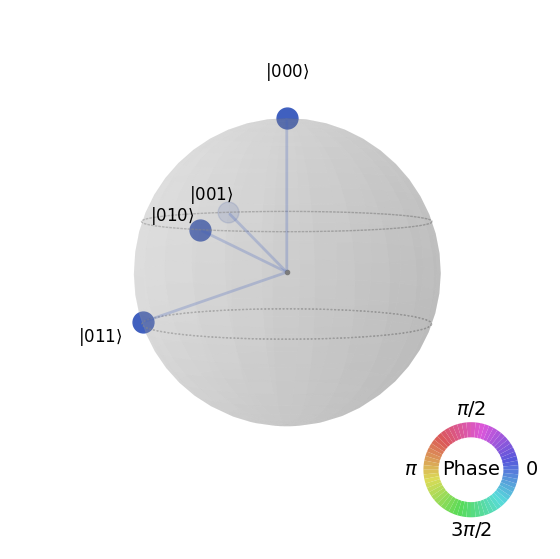

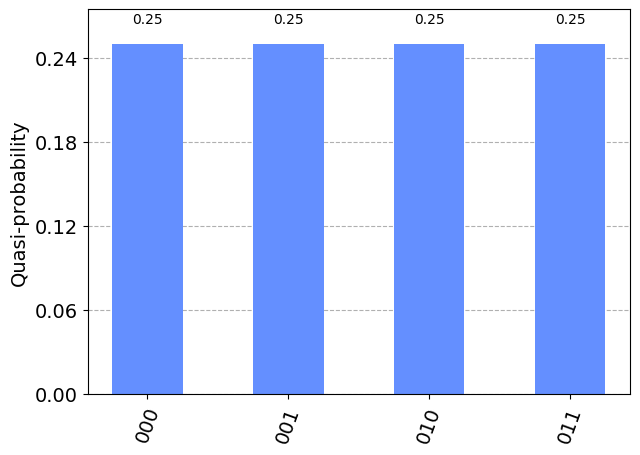

In [8]:
# Cell 4 - Three qubits NOT entangled (no measurement)

backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(3)
qc.save_statevector("sv1")

qc.h(0)
qc.save_statevector("sv2")

qc.h(1)
qc.save_statevector("sv3")

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]
sv3: Any = result.data(0)["sv3"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))  # type: ignore

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))  # type: ignore

display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))  # type: ignore

display(plot_state_qsphere(sv3))  # type: ignore
display(plot_distribution(counts))  # type: ignore


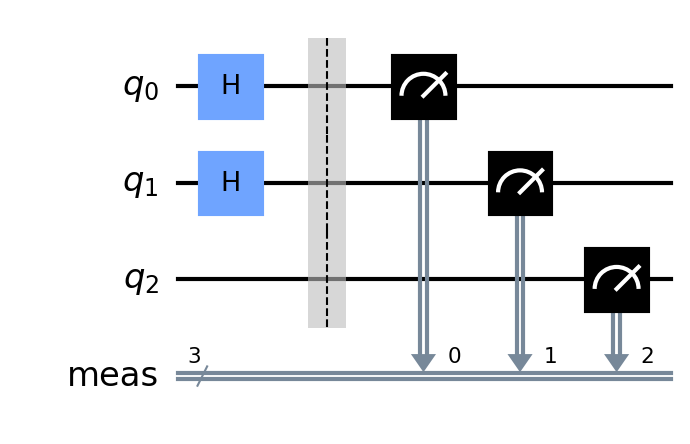

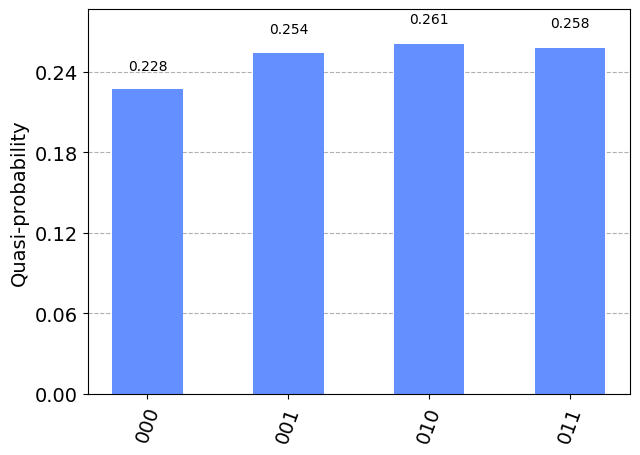

In [5]:
# Cell 5 - Three qubits NOT entangled (default 1024 shots)

backend: Any = Aer.get_backend("aer_simulator")

qc: Any = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.measure_all()

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
display(plot_distribution(counts))  # type: ignore


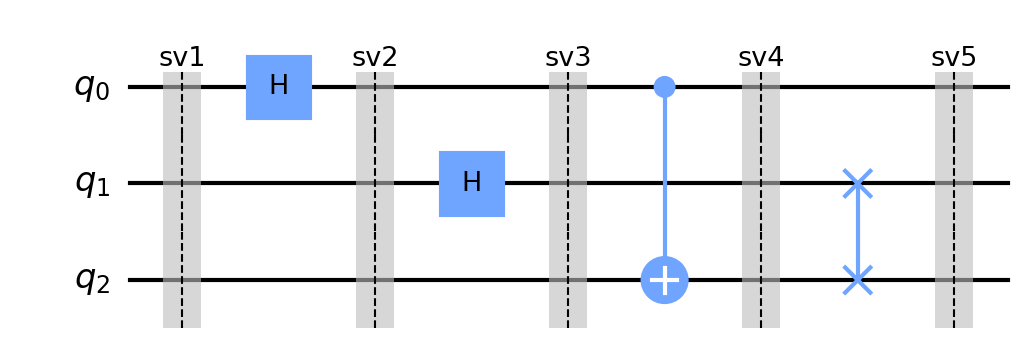

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

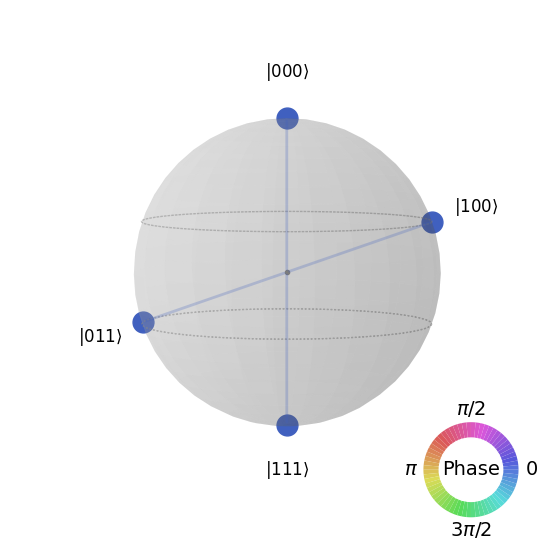

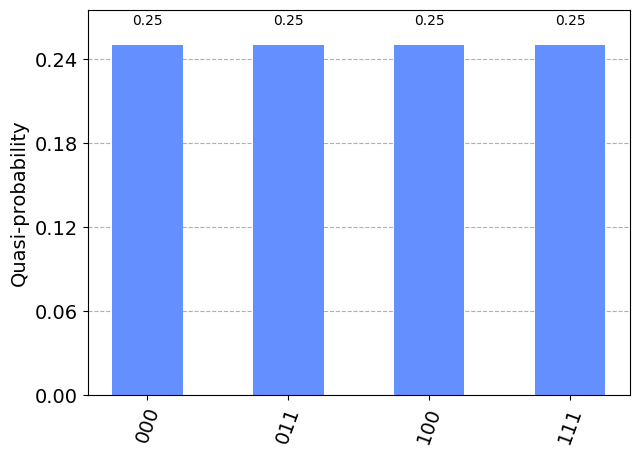

In [6]:
# Cell 6 - Three qubits ENTANGLED (no measurement)

backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(3)
qc.save_statevector("sv1")

qc.h(0)
qc.save_statevector("sv2")

qc.h(1)
qc.save_statevector("sv3")

qc.cx(0, 2)
qc.save_statevector("sv4")

qc.swap(1, 2)
qc.save_statevector("sv5")

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]
sv3: Any = result.data(0)["sv3"]
sv4: Any = result.data(0)["sv4"]
sv5: Any = result.data(0)["sv5"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(as_latex(sv5, prefix=r"\mathbf{Statevector\;5}="))

display(plot_state_qsphere(sv5))  # type: ignore
display(plot_distribution(counts))  # type: ignore


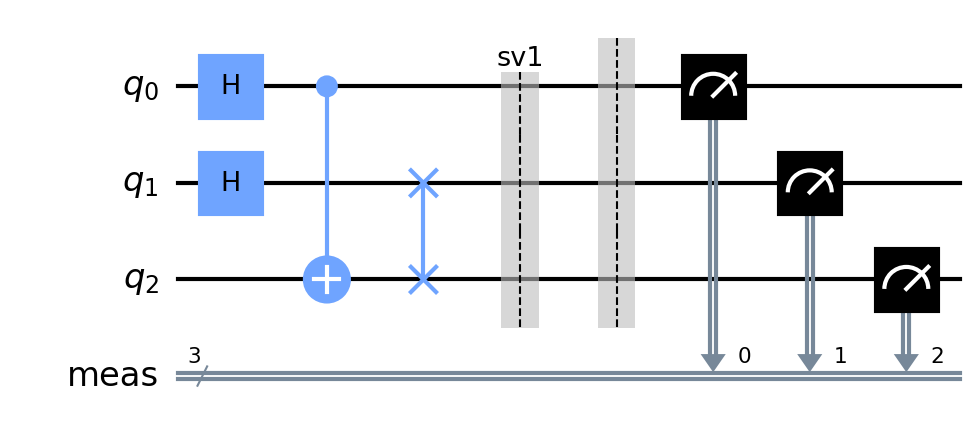

<IPython.core.display.Math object>

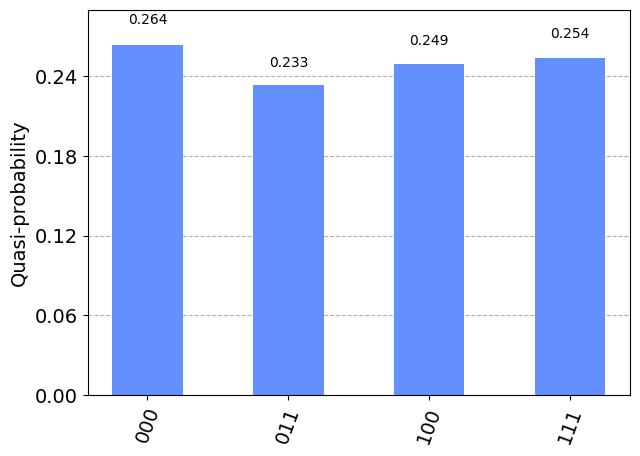

In [11]:
# Cell 7 - Three qubits ENTANGLED (default 1024 shots)

backend: Any = Aer.get_backend("aer_simulator")

qc: Any = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(0, 2)
qc.swap(1, 2)
qc.save_statevector("sv1")
qc.measure_all()

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()
sv1: Any = result.data(0)["sv1"]

display(qc.draw(output="mpl", scale=1.5))
display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_distribution(counts))  # type: ignore


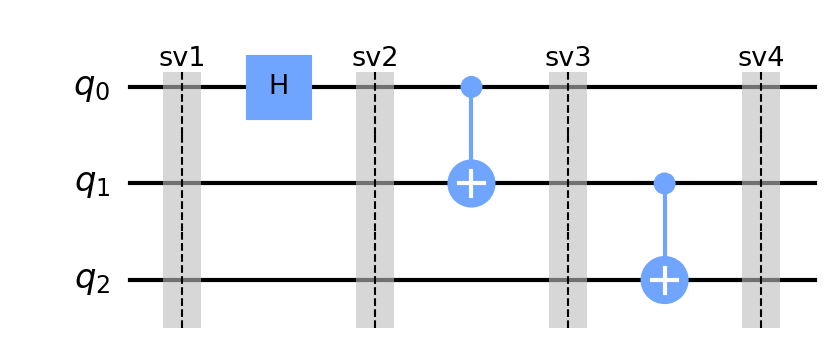

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

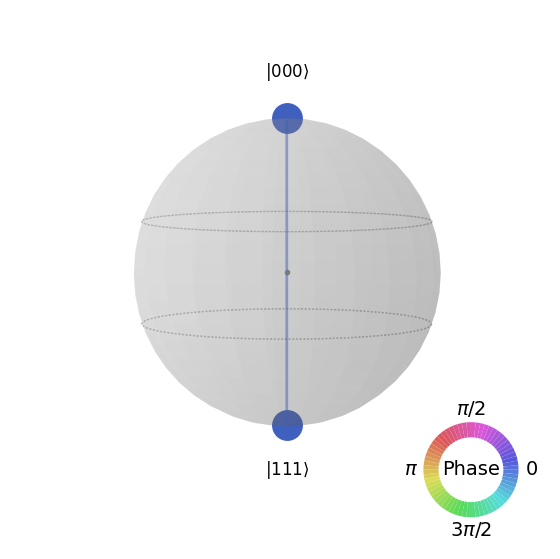

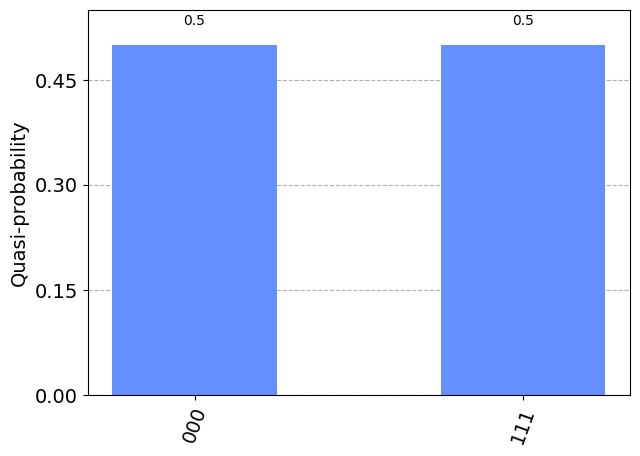

In [10]:
# Cell 8 - Greenberger–Horne–Zeilinger (GHZ) state (default 1024 shots)

backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(3)
qc.save_statevector("sv1")

qc.h(0)
qc.save_statevector("sv2")

qc.cx(0, 1)
qc.save_statevector("sv3")

qc.cx(1, 2)
qc.save_statevector("sv4")

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]
sv3: Any = result.data(0)["sv3"]
sv4: Any = result.data(0)["sv4"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))

display(plot_state_qsphere(sv4))  # type: ignore
display(plot_distribution(counts))  # type: ignore


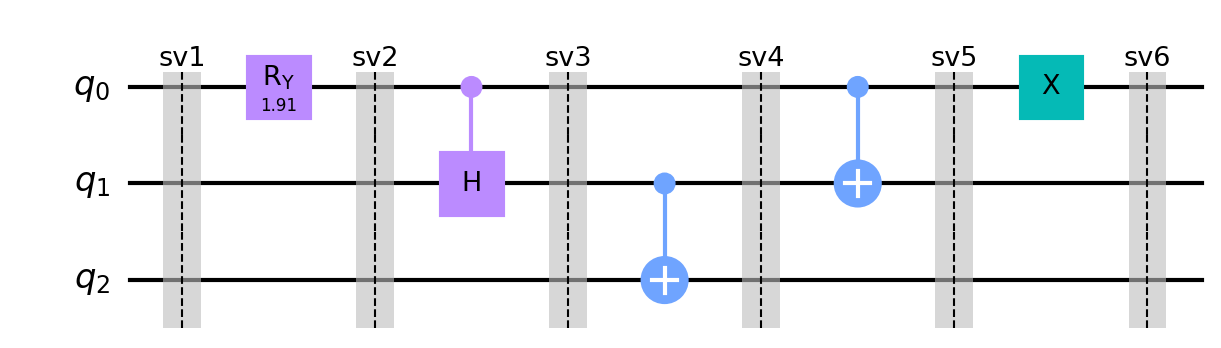

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

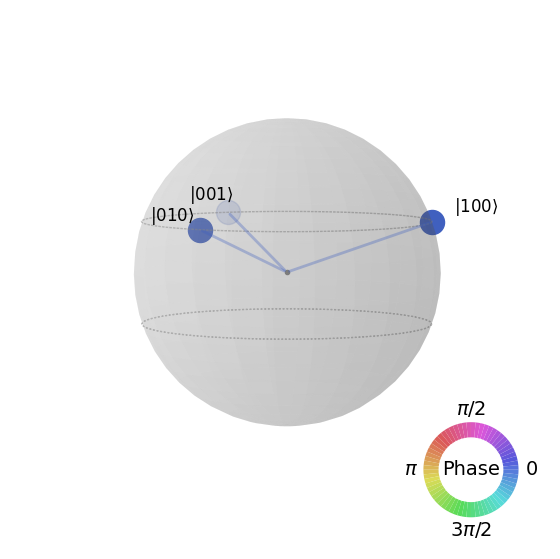

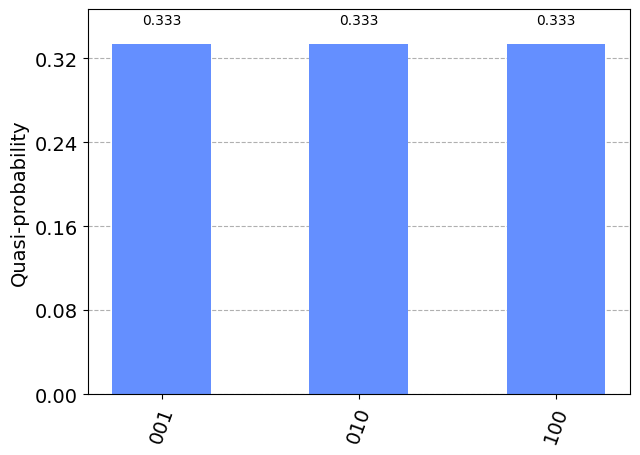

In [8]:
# Cell 9 - Wolfgang Dur (W) state (default 1024 shots)

backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(3)
qc.save_statevector("sv1")

qc.ry(2 * np.arccos(1 / np.sqrt(3)), 0)
qc.save_statevector("sv2")

qc.ch(0, 1)
qc.save_statevector("sv3")

qc.cx(1, 2)
qc.save_statevector("sv4")

qc.cx(0, 1)
qc.save_statevector("sv5")

qc.x(0)
qc.save_statevector("sv6")

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]
sv3: Any = result.data(0)["sv3"]
sv4: Any = result.data(0)["sv4"]
sv5: Any = result.data(0)["sv5"]
sv6: Any = result.data(0)["sv6"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(as_latex(sv5, prefix=r"\mathbf{Statevector\;5}="))
display(as_latex(sv6, prefix=r"\mathbf{Statevector\;6}="))

display(plot_state_qsphere(sv6))  # type: ignore
display(plot_distribution(counts))  # type: ignore


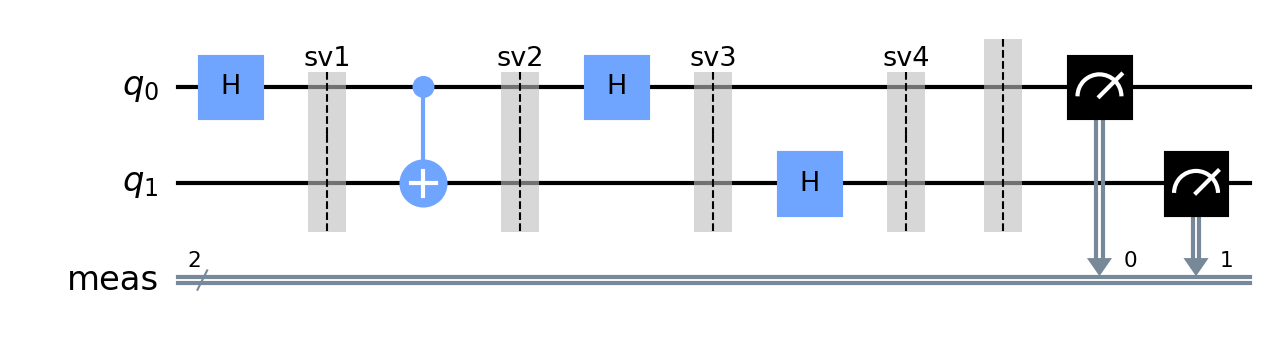

<IPython.core.display.Math object>

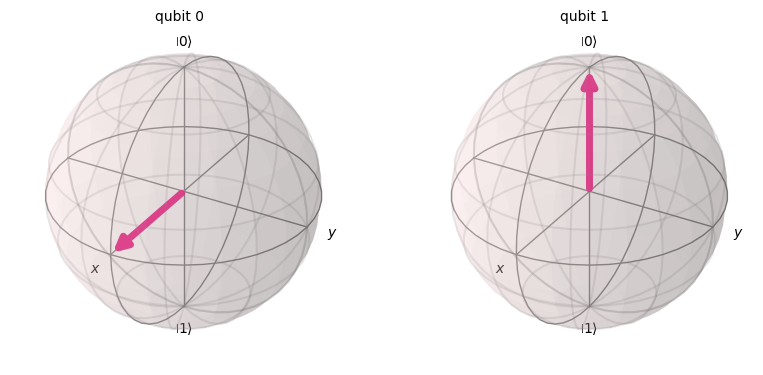

<IPython.core.display.Math object>

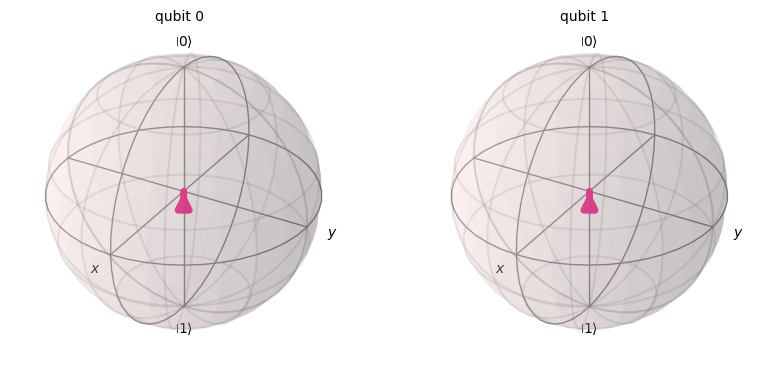

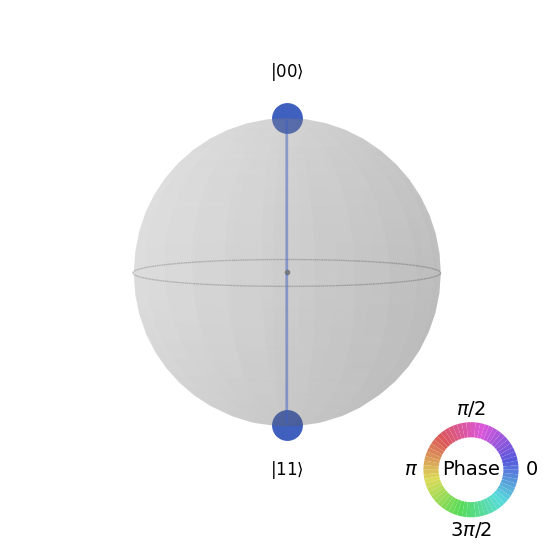

<IPython.core.display.Math object>

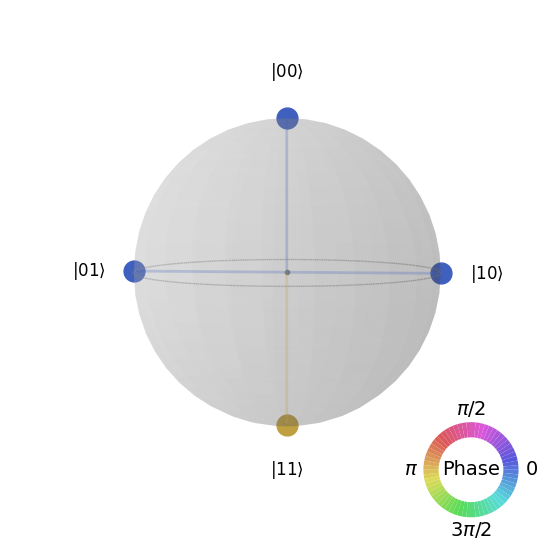

<IPython.core.display.Math object>

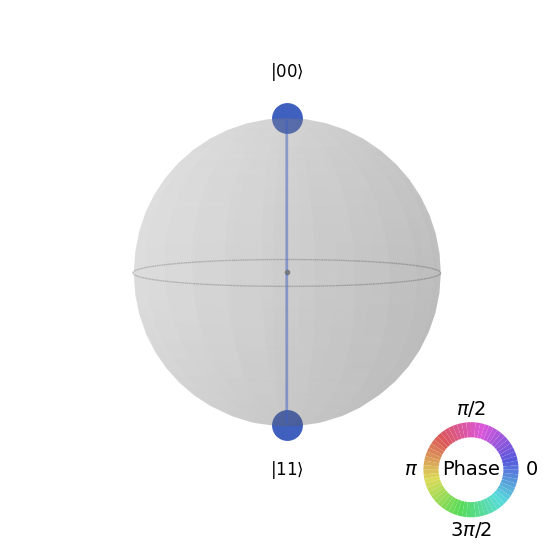

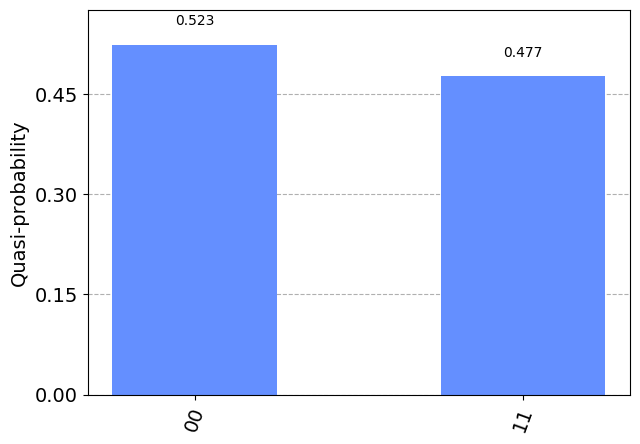

In [9]:
# Cell 10 - Hadamard after Entanglement

backend: Any = Aer.get_backend("aer_simulator")

qc: Any = QuantumCircuit(2)
qc.h(0)
qc.save_statevector("sv1")
qc.cx(0, 1)
qc.save_statevector("sv2")
qc.h(0)
qc.save_statevector("sv3")
qc.h(1)
qc.save_statevector("sv4")
qc.measure_all()

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]
sv3: Any = result.data(0)["sv3"]
sv4: Any = result.data(0)["sv4"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))  # type: ignore

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))  # type: ignore
display(plot_state_qsphere(sv2))  # type: ignore

display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_state_qsphere(sv3))  # type: ignore

display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(plot_state_qsphere(sv4))  # type: ignore

display(plot_distribution(counts))  # type: ignore
